# 数据读入模块

In [2]:
import pandas as pd

train_data = pd.read_csv("data\main\df_train_b1.csv", index_col=0)
test_data = pd.read_csv('data\main\df_test_b1.csv', index_col=0)


## 要读入除了main之外的数在此处添加

In [3]:
import os
filenames = ["data\detail\df_basic_b1.csv",
             "data\detail\df_corp_b1.csv",
             "data\detail\df_judicial_b1.csv",
             "data\detail\df_loan2_b1.csv",
             "data\detail\df_query_b1.csv"]
for filename in filenames:
    temp = pd.read_csv(filename)
    train_data = pd.merge(train_data, temp, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, temp, on="cust_id",
                         how="left", suffixes=("", "_y"))


In [4]:
train_data['is_judicial']=[0 if pd.isna(i) else 1 for i in train_data['judicial_reason']]
test_data['is_judicial']=[0 if pd.isna(i) else 1 for i in test_data['judicial_reason']]

## 处理NAN

In [5]:
def delnan(df):
    df = df.dropna(how="all", axis=1)  # 删除全是空值的列
    df = df.fillna(-99)
    return df


In [6]:
df_train = delnan(train_data)
df_test = delnan(test_data)


In [7]:
""" for i in range(2, 17):
    print(df_train.iloc[:, i].value_counts()) """


' for i in range(2, 17):\n    print(df_train.iloc[:, i].value_counts()) '

In [8]:
type_col = ["basic_1",
            "basic_10",
            "basic_12",
            "basic_14",
            "loan1_16",
            "loan1_20",
            "loan1_23",
            "loan1_25",]

## 转化为one-hot编码（不宜采用）

In [9]:

def to_one_hot(df, colnames):
    df = pd.get_dummies(df, columns=colnames)
    return df


""" df_train = to_one_hot(df_train, type_col)
df_test = to_one_hot(df_test, type_col)
for i in df_train.columns:
    if i not in df_test.columns:
        df_test[i] = 0
 """

' df_train = to_one_hot(df_train, type_col)\ndf_test = to_one_hot(df_test, type_col)\nfor i in df_train.columns:\n    if i not in df_test.columns:\n        df_test[i] = 0\n '

## 证据权重

In [10]:
import pandas as pd
import numpy as np

def cal_woe(df,df_no_label,x_cols,y_col):
    for i in x_cols:
        x_set=pd.unique(df[i])
        for j in x_set:
            woe=np.mean(df[df[i]==j][y_col])
            df[i].replace(j,woe,inplace=True)
            df_no_label[i].replace(j,woe,inplace=True)
    return df,df_no_label

In [11]:
df_train,df_test=cal_woe(df_train,df_test,type_col,"label")

In [12]:
full_col_name = list(df_train.columns)
basic_col = [i for i in full_col_name if "basic" in i]
loan_col = [i for i in full_col_name if "loan" in i]
overdue_col = [i for i in full_col_name if "overdue" in i]
query_col = [i for i in full_col_name if "query" in i]
judicial_col=[i for i in full_col_name if "judicial" in i]

""" for i in judicial_col:
    df_train[i].astype("float")
    df_test[i].astype("float") """

' for i in judicial_col:\n    df_train[i].astype("float")\n    df_test[i].astype("float") '

## 设置哪些x作为模型自变量输入

In [13]:
x_col = basic_col+['is_judicial']+loan_col+query_col+overdue_col
# x_col为模型读入的自变量列名称


""" x_col=['loan2_3_y',
 'loan1_6',
 'loan1_32',
 'loan1_31',
 'basic_7',
 'loan2_4_y',
 'loan2_3',
 'loan1_15',
 'loan2_5_y',
 'loan1_30',
 'loan1_7',
 'loan1_3',
 'query_1',
 'query_7',
 'loan1_17',
 'query_4',
 'loan1_14',
 'basic_1_y',
 'loan1_21',
 'query_1_y'] """

" x_col=['loan2_3_y',\n 'loan1_6',\n 'loan1_32',\n 'loan1_31',\n 'basic_7',\n 'loan2_4_y',\n 'loan2_3',\n 'loan1_15',\n 'loan2_5_y',\n 'loan1_30',\n 'loan1_7',\n 'loan1_3',\n 'query_1',\n 'query_7',\n 'loan1_17',\n 'query_4',\n 'loan1_14',\n 'basic_1_y',\n 'loan1_21',\n 'query_1_y'] "

In [14]:
# df_train.drop(columns=drop_col)

# 训练模型

## 划分测试集训练集

In [15]:
""" from sklearn import model_selection


X = df_train[x_col]
Y = df_train["label"]
seed = 666
test_size = 0.1
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, test_size=test_size, random_state=seed) """


' from sklearn import model_selection\n\n\nX = df_train[x_col]\nY = df_train["label"]\nseed = 666\ntest_size = 0.1\nX_train, X_test, y_train, y_test = model_selection.train_test_split(\n    X, Y, test_size=test_size, random_state=seed) '

## 训练模型

## 超参数

In [16]:
N = 1000
num_round = 100
local_test_size=3000

max_depth = [3, 4, 5,6,7,8]
eta = [0.1,0.06]
colsample_bytree = [0.8,0.7, 0.6,0.5]
scale_pos_weight = [1, 3, 6, 10,20, 30]
test_size=[0.3,0.5,0.7]
subsample=[0.7,0.6,0.5,0.4]
par_lambda=[1,1.5,2,3]
alpha=[0,0.2,0.4,0.6,0.8]
min_child_weight=[1,2,3,4,5,6,10]


### train划分为
* 本地测试集（固定）d_localtest
* 训练集（固定）
  * 评估集（每次的模型不同）dtest
  * 真正地训练集（每次的模型不同）dtrain

In [17]:
import copy
import xgboost as xgb
import random
from sklearn import model_selection
from sklearn.metrics import roc_auc_score


pred_labels = []
local_test_labels = []
loss_seq = []
max_auc_loss = 0
flag=0

num_seq=list(range(len(df_train)))
np.random.shuffle(num_seq)

X_local_test=df_train[x_col].iloc[num_seq[0:local_test_size]]
Y_local_test=df_train["label"].iloc[num_seq[0:local_test_size]]

d_localtest=xgb.DMatrix(X_local_test,label=Y_local_test)

X = df_train[x_col].iloc[num_seq[local_test_size:len(df_train)]]
Y = df_train['label'].iloc[num_seq[local_test_size:len(df_train)]]
x_perd = xgb.DMatrix(df_test[x_col])

for i in range(N):

    #seed = 666
    test_size_this_round=random.choice(test_size)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, Y, test_size=test_size_this_round)
    # seed+=1

    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    evallist = [(dtest, 'eval')]

    param = {
        'max_depth': random.choice(max_depth),
        'eta': random.choice(eta),
        'colsample_bytree': random.choice(colsample_bytree),
        'objective': 'binary:logistic',
        #'verbosity':0,
        'scale_pos_weight': random.choice(scale_pos_weight),
        'eval_metric': 'auc',
        'subsample':random.choice(subsample),
        'alpha':random.choice(alpha),
        'lambda':random.choice(par_lambda),
        'min_child_weight':random.choice(min_child_weight),
        #'seed': 666,
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        #"enable_enable_categorical":True,
    }
    
    bst = xgb.train(param, dtrain, num_round, evals=evallist,
                    early_stopping_rounds=10, verbose_eval=False)
    
    loss = float(bst.eval(dtest).split(":")[1])
    train_loss = float(bst.eval(dtrain).split(":")[1])
    local_test_loss = float(bst.eval(d_localtest).split(":")[1])

    pred_label = list(bst.predict(x_perd))
    test_label = list(bst.predict(xgb.DMatrix(X_local_test)))
    # temp=roc_auc_score(y_test,test_label)
    # print(test_label[0:10])


    temp_dict={"test_auc":loss,"train_auc":train_loss,'local_test_auc':local_test_loss,'test_size':test_size_this_round}
    temp_dict.update(param)

    #info_df=info_df.append(pd.DataFrame(temp_dict))
    if flag==0:
        info_df=pd.DataFrame(temp_dict,index=[i])
        flag=1
    else:
        info_df=pd.concat([info_df,pd.DataFrame(temp_dict,index=[i])])

    if loss > max_auc_loss:
        best_bst = copy.deepcopy(bst)
        max_auc_loss = loss
    

    print(i+1, ":", loss, sep="")
    #print(param)
    #print("-------------------------")
    pred_labels.append([j for j in pred_label])
    local_test_labels.append(copy.deepcopy(test_label))


print('最大AUC:', max(info_df['local_test_auc']), sep="")

1:0.6543209257830032
2:0.7202699907568403
3:0.6832337622830711
4:0.6897538532321141
5:0.6924622376101676
6:0.6945378509421425
7:0.7216792846813503
8:0.7042040688516501
9:0.6513542392466952
10:0.6854809163102119
11:0.7105111848157653
12:0.6595449753571874
13:0.638156852191942
14:0.6798063580241259
15:0.6801382933295376
16:0.7036683978699625
17:0.6802838987437879
18:0.722338324868509
19:0.6890286995866529
20:0.6993093107685046
21:0.7208419791379073
22:0.6643652433425161
23:0.6757958454534883
24:0.6791172465689612
25:0.6592188610999693
26:0.6956224572728894
27:0.6890073480671388
28:0.4993581747242542
29:0.7080398196384986
30:0.6985800520342637
31:0.7005991483843217
32:0.7014737325692653
33:0.7079970182421693
34:0.6879598012701615
35:0.6862821255771376
36:0.6806936165960115
37:0.7101471264367816
38:0.7146802498929651
39:0.7172772274341288
40:0.6436340168010326
41:0.6539077773055674
42:0.6974541569987189
43:0.6910894465148829
44:0.6581259359603728
45:0.7146822914604696
46:0.6854054206106978

In [18]:
info_df

,test_auc,train_auc,local_test_auc,test_size,max_depth,eta,colsample_bytree,objective,scale_pos_weight,eval_metric,subsample,alpha,lambda,min_child_weight,tree_method,gpu_id
0,0.654321,0.864578,0.649379,0.7,7,0.06,0.8,binary:logistic,1,auc,0.6,0.0,1.5,6,gpu_hist,0
1,0.720270,0.969411,0.696912,0.3,7,0.06,0.7,binary:logistic,10,auc,0.4,0.4,3.0,4,gpu_hist,0
2,0.683234,0.989301,0.688937,0.5,6,0.10,0.8,binary:logistic,30,auc,0.7,0.0,2.0,6,gpu_hist,0
3,0.689754,0.968196,0.691133,0.5,6,0.06,0.7,binary:logistic,30,auc,0.7,0.4,1.0,6,gpu_hist,0
4,0.692462,0.959613,0.719183,0.7,3,0.10,0.7,binary:logistic,20,auc,0.7,0.6,2.0,10,gpu_hist,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.683942,0.949452,0.693445,0.7,5,0.10,0.5,binary:logistic,3,auc,0.7,0.8,1.0,10,gpu_hist,0
996,0.708971,0.903032,0.710368,0.3,4,0.06,0.7,binary:logistic,10,auc,0.4,0.6,2.0,3,gpu_hist,0
997,0.707772,0.981186,0.737427,0.3,5,0.10,0.8,binary:logistic,3,auc,0.6,0.6,2.0,1,gpu_hist,0
998,0.700438,0.889396,0.705132,0.3,4,0.06,0.5,binary:logistic,30,auc,0.6,0.0,3.0,3,gpu_hist,0


In [19]:
info_df.to_csv("info.csv",encoding="utf-8",index=False)

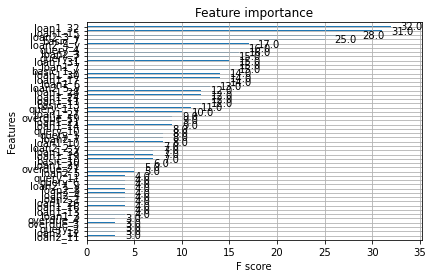

In [20]:
pic=xgb.plot_importance(best_bst,max_num_features=50)
temp=pic.get_ymajorticklabels()
important_x=[str(i).split("\'")[1] for i in temp]
important_x.reverse()

In [21]:
important_x

['loan1_32',
 'loan1_15',
 'loan2_3_y',
 'basic_7',
 'loan2_4_y',
 'query_4',
 'loan2_3',
 'query_7',
 'loan1_31',
 'loan1_7',
 'basic_1_y',
 'loan1_30',
 'loan1_17',
 'loan1_6',
 'loan2_5_y',
 'loan1_28',
 'loan1_24',
 'loan1_11',
 'basic_13',
 'query_1_y',
 'loan1_27',
 'overdue_19',
 'loan1_21',
 'loan1_14',
 'query_10',
 'query_1',
 'loan2_7',
 'loan1_10',
 'loan2_2_y',
 'loan1_33',
 'loan1_19',
 'basic_10',
 'loan1_29',
 'overdue_21',
 'loan2_5',
 'query_11',
 'query_6',
 'loan2_1_y',
 'loan2_8',
 'loan2_4',
 'loan2_1',
 'loan1_26',
 'loan1_16',
 'loan1_13',
 'loan1_3',
 'overdue_4',
 'overdue_3',
 'query_2',
 'loan2_12',
 'loan2_11']

* basic_7:年龄
* 

# 输出模块

In [25]:
import time
import numpy as np
from sklearn.metrics import roc_auc_score

date = time.strftime("%Y%m%d-%H%M%S", time.localtime())
res_num = np.argsort([-i for i in info_df['local_test_auc']])

# 选择前n个结果进行平均（手动指定or在本地测试集排序选出）
if True:
    max_auc = -1
    list_temp = []
    for i in range(N):
        list_temp.append(local_test_labels[res_num[i]])
        temp = np.exp(np.mean(np.log(list_temp), axis=0))
        temp_auc = roc_auc_score(Y_local_test, temp)
        print(i, temp_auc)
        if temp_auc > max_auc:
            max_auc = temp_auc
            n = i
else:
    n = 100

res_num = res_num[0:n]

final_pred_label = np.exp(
    np.mean(np.log([pred_labels[i] for i in res_num]), axis=0))
#local_auc = roc_auc_score(y_test, final_pred_label)
print("本地测试集前", n, "个auc为", [list(info_df['local_test_auc'])[i] for i in res_num], sep="")
print("平均之后最大AUC为",max_auc,sep="")

res = pd.DataFrame({
    'cust_id': list(df_test["cust_id"]),
    'label': final_pred_label,
})
res.to_csv("./output/result"+date+".csv", encoding="utf-8", index=False)


0 0.7681378693233243
1 0.7839336882981157
2 0.7890464106776321
3 0.7892957284690181
4 0.7882164898104161
5 0.7876051489246889
6 0.7863004996601765
7 0.7847157947943812
8 0.7834452986519762
9 0.784104453908654
10 0.7826751457484485
11 0.7822431087537868
12 0.7831652430506936
13 0.7826529462190785
14 0.7825265796672802
15 0.7828988486982538
16 0.7834179761542902
17 0.7832403799193304
18 0.7833599158467071
19 0.7836843705067298
20 0.7824377815498004
21 0.7813585428911984
22 0.7806447426391484
23 0.77993777301152
24 0.7800948773732151
25 0.7807096335711528
26 0.7804773923408209
27 0.780357856413444
28 0.7802314898616457
29 0.7799480189481521
30 0.7794630446142234
31 0.779381077121165
32 0.7788926874750255
33 0.7784452815754153
34 0.77824377815498
35 0.7781344881642356
36 0.7781925484718185
37 0.778462358136469
38 0.778230116906137
39 0.7779159081827465
40 0.7772909060481763
41 0.7767922704654046
42 0.7763414492535836
43 0.7763619411268481
44 0.7766522426647631
45 0.7764336626832743
46 0.77

# 一些tips

* 提升n有一定提升(如何确定n？)
  * n=40 0.6763
  * n=10 0.6728
  * n=100 0.6774
  * 太大也不好

# 一些进展

* 随机参数
* XGB模型
* 本地测试集auc较高（0.75+）
* 部分类型变量进行了one-hot处理
* 把细分表除了loan与主表合并

# tbd

* 处理细分表的loan，给出指标
* 确定变量类型，以便对所有（or重要）分类变量进行one-hot处理
* 新模型？